<a href="https://colab.research.google.com/github/Drodricks0/Sales_Prediction/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

filename = '/content/sales_predictions (2).csv'
df = pd.read_csv(filename)
df.head()                           #Week 1 Entry

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Data Cleaning**

In [ ]:
df.shape                #8523 rows with 12 columns

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().any()                                 # no duplicates

False

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df = df.replace(to_replace= "LF", value="Low Fat")

df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df = df.replace(to_replace= "low fat", value="Low Fat")

df['Item_Fat_Content'].value_counts()                                   #Corrected Item Fat Content Column by combining low fat types of counts

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
df = df.replace(to_replace= "reg", value="Regular")

df['Item_Fat_Content'].value_counts()                                   #Corrected Item Fat Content Column by combining Regualr types of counts

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'].fillna(value ='No Size', inplace = True)                       #Filled Outlet Size with 'No size' so that I keep data points instead of dropping them

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df = df.drop(columns=['Item_Weight'])
                                                        #Week 2 Entry
df.head()                                               #decided to drop Item_Weight due to lack of relativity with other columns

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Finding Correlations Between Features**

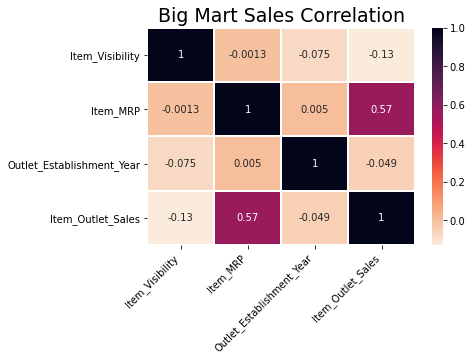

In [ ]:
corr = df.corr()
g = sns.heatmap(corr, cmap = 'rocket_r', linewidth = 1, annot = True)
plt.title('Big Mart Sales Correlation', size = 19)                                     #https://www.codegrepper.com/code-examples/whatever/rotate+the+x+labels+on+heatmap rotate labels
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');      #this is meant for identifying any correlations in the immediate data

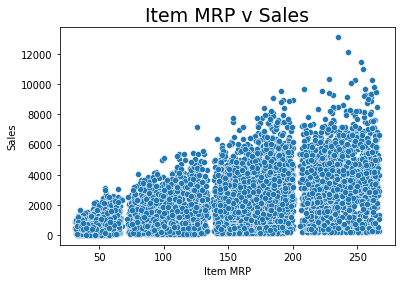

In [ ]:
outlet_sales = df['Item_Outlet_Sales']
mrp = df['Item_MRP']

sns.scatterplot(x=mrp, y=outlet_sales)
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.title('Item MRP v Sales', size=19);                       

In [ ]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


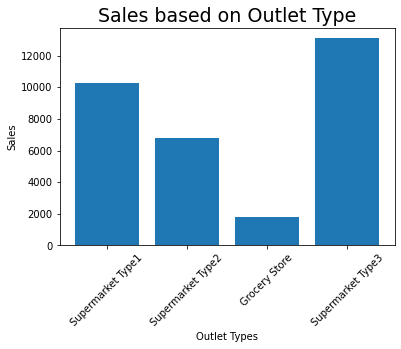

In [ ]:
outlet_type = df['Outlet_Type']


plt.bar(outlet_type,outlet_sales)
plt.xticks(rotation=45)
plt.xlabel('Outlet Types')
plt.ylabel('Sales')
plt.title('Sales based on Outlet Type', size=19);

In [ ]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


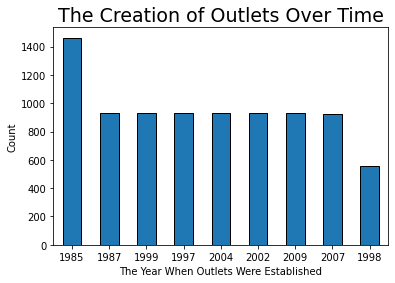

In [ ]:
df['Outlet_Establishment_Year'].value_counts().plot(kind = 'bar', edgecolor = 'black')    #includes "Grocery Stores"
plt.xticks(rotation = 0)
plt.xlabel('The Year When Outlets Were Established')
plt.ylabel('Count')
plt.title('The Creation of Outlets Over Time', size=19);

''

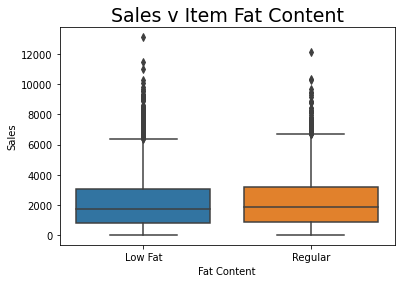

In [ ]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.title('Sales v Item Fat Content', size=19)
;

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


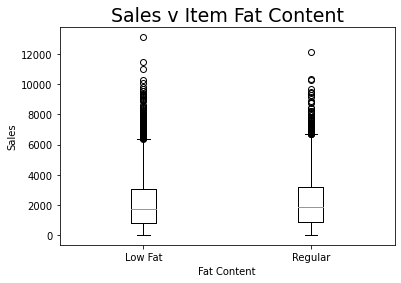

In [ ]:
low_fat = df.loc[df['Item_Fat_Content'] == 'Low Fat', 'Item_Outlet_Sales'].values         #Week 4 Submission 
regular = df.loc[df['Item_Fat_Content'] == 'Regular', 'Item_Outlet_Sales'].values

plt.boxplot([low_fat,regular], labels=['Low Fat','Regular'])
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.title('Sales v Item Fat Content', size=19);

In [ ]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Machine Learning: Linear Regression**

In [ ]:
reg_df = df
reg_df.drop(columns =['Item_Identifier','Outlet_Identifier','Item_Visibility'], inplace = True)
reg_df.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,182.0950,1998,No Size,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
reg_df = pd.get_dummies(reg_df, columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = False)
reg_df.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_No Size,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,1999,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
y = reg_df['Item_Outlet_Sales']
X = reg_df.drop(columns ='Item_Outlet_Sales')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X,y,random_state=42)

reg = LinearRegression()

reg.fit(X_train,y_train)

train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

train_score = reg.score(X_train,y_train)
print(train_score)
test_score = reg.score(X_test,y_test)                 #model 1 Linear Reg
print(test_score)

0.561390485535962
0.5673754701497443


In [ ]:
r2_score(y_test,test_preds)       # 57% of the data is represented by the true data set.

0.5673754701497443

In [ ]:
r2_score(y_train,train_preds)

0.561390485535962

In [ ]:
mean_absolute_error(y_test,test_preds)

803.3458948730444

In [ ]:
mean_squared_error(y_test,test_preds)

1193601.2520048874

In [ ]:
np.sqrt(mean_squared_error(y_test,test_preds))            #  +/- $1092 of error of the predicted $ amount.

1092.5205956891098

In [ ]:
np.sqrt(mean_squared_error(y_train,train_preds))

1139.317966873261

In [ ]:
np.sqrt(mean_squared_error(y_test,test_preds))            #Results Model 1

1092.5205956891098

## **Machine Learning: Decision Tree**

In [ ]:
regg_2 = DecisionTreeRegressor(random_state = 42)          #decision tree     Model 2

regg_2.fit(X_train, y_train)

train_preds = regg_2.predict(X_train)
test_preds = regg_2.predict(X_test)

train_2_score = regg_2.score(X_train, y_train)
test_2_score = regg_2.score(X_test, y_test)

print(train_2_score)
print(test_2_score)

0.9998487583179674
0.17542700963036006


In [ ]:
r2_score(y_train, train_preds) 

0.9998487583179675

In [ ]:
r2_score(y_test,test_preds) 

0.17542700963036006

In [ ]:
np.sqrt(mean_squared_error(y_train,regg_2.predict(X_train)))    

21.156395218778353

In [ ]:
np.sqrt(mean_squared_error(y_test,regg_2.predict(X_test)))      
                                                                #Results Model 2

1508.3030705294782

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 37)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    regg_3 = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    regg_3.fit(X_train, y_train)
    score = regg_3.score(X_test, y_test)
    r2.append(score)

''

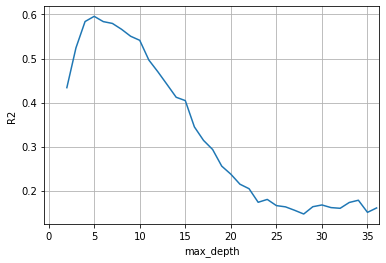

In [ ]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')
plt.xlim(-0.5,36.25)
plt.grid()
;

In [ ]:
regg_4 = DecisionTreeRegressor(max_depth = 5, random_state = 42)          #decision tree
regg_4.fit(X_train, y_train)
train_2_score = regg_4.score(X_train, y_train)
test_2_score = regg_4.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.6037426008184527
0.5957680420497304


## **Machine Learning: Bagged Trees**

In [ ]:
bagreg = BaggingRegressor(random_state = 42)            #bagging trees    Model 3

bagreg.fit(X_train,y_train)

train_preds = bagreg.predict(X_train)
test_preds = bagreg.predict(X_test)

train_score = bagreg.score(X_train,y_train)
print(train_score)
test_score = bagreg.score(X_test,y_test)
print(test_score)

0.9142990820940223
0.48625171561356434


In [ ]:
r2_score(y_train, train_preds) 

0.9142990820940223

In [ ]:
r2_score(y_test,test_preds) 

0.4862517156135644

In [ ]:
np.sqrt(mean_squared_error(y_train,bagreg.predict(X_train)))

503.61500213953894

In [ ]:
np.sqrt(mean_squared_error(y_test,bagreg.predict(X_test)))          #Results Model 3

1190.5544289413274

## **Machine Learning: Random Forests**

In [ ]:
rf = RandomForestRegressor(max_depth = 5,random_state = 42)         #random forest      Model 4

rf.fit(X_train, y_train)

rf.predict(X_test)

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.6101927509558669
0.601975644296012


In [ ]:
r2_score(y_train, train_preds) 

0.9142990820940223

In [ ]:
r2_score(y_test,test_preds) 

0.4862517156135644

In [ ]:
np.sqrt(mean_squared_error(y_train,rf.predict(X_train)))

1074.0657739866142

In [ ]:
np.sqrt(mean_squared_error(y_test,rf.predict(X_test)))        #Results Model 4

1047.9218278961366

## **Feature Importance**

Feature: 0, Score: 0.56
Feature: 1, Score: 0.03
Feature: 2, Score: 0.00
Feature: 3, Score: 0.00
Feature: 4, Score: 0.00
Feature: 5, Score: 0.00
Feature: 6, Score: 0.00
Feature: 7, Score: 0.00
Feature: 8, Score: 0.00
Feature: 9, Score: 0.00
Feature: 10, Score: 0.00
Feature: 11, Score: 0.00
Feature: 12, Score: 0.00
Feature: 13, Score: 0.00
Feature: 14, Score: 0.00
Feature: 15, Score: 0.00
Feature: 16, Score: 0.00
Feature: 17, Score: 0.00
Feature: 18, Score: 0.00
Feature: 19, Score: 0.00
Feature: 20, Score: 0.00
Feature: 21, Score: 0.00
Feature: 22, Score: 0.00
Feature: 23, Score: 0.00
Feature: 24, Score: 0.00
Feature: 25, Score: 0.00
Feature: 26, Score: 0.00
Feature: 27, Score: 0.31
Feature: 28, Score: 0.00
Feature: 29, Score: 0.00
Feature: 30, Score: 0.10


''

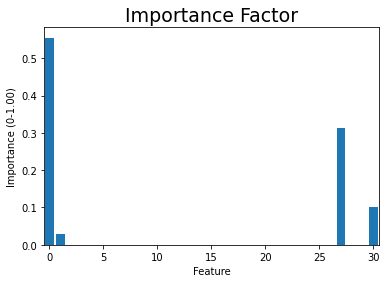

In [ ]:
importance = rf.feature_importances_              
 #summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.2f' % (i,v))
 #plot feature importance
plt.bar([x for x in range(len(importance))], importance);
plt.xlim(-0.5,30.5)
plt.xlabel('Feature')
plt.ylabel('Importance (0-1.00)')
plt.title('Importance Factor', size=19)
;

In [ ]:
data = {'Feature': X.columns, 'Importance': rf.feature_importances_}  #Mandy and I came to this conclusion on printing the features titles with their importance, but she did the majority "brain blasts", I just helped her get there
feat_importance = pd.DataFrame(data)                                  #important features are: 0,2,27,30
feat_importance

,Feature,Importance
0,Item_MRP,0.555086
1,Outlet_Establishment_Year,0.027692
2,Item_Fat_Content_Low Fat,0.000046
3,Item_Fat_Content_Regular,0.000074
4,Item_Type_Baking Goods,0.000038
5,Item_Type_Breads,0.000031
6,Item_Type_Breakfast,0.000090
7,Item_Type_Canned,0.000039
8,Item_Type_Dairy,0.000082
9,Item_Type_Frozen Foods,0.000131
